In [1]:
# In this notebook, we use a simple Prophet model for predicting the ETH price next day.

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json
from prophet.plot import *

Importing plotly failed. Interactive plots will not work.


In [14]:
from giza_datasets import DatasetsLoader
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
import datetime
import json
from prophet.serialize import model_to_json, model_from_json
from prophet.plot import *

In [3]:
### Giza

In [16]:
df = DatasetsLoader().load('tokens-daily-prices-mcap-volume')

In [28]:
pd.to_datetime(df['date'])
df: pd.DataFrame = df.to_pandas()
df.set_index("date", inplace=True)

In [26]:
token='ETH'
diff = datetime.datetime.today() - data.iloc[-1].ds
days_for_forecast = diff.days + 1

In [29]:
df = df[df['token'] == token]
data = df[["price"]].reset_index().rename(columns={"price": "y", "date": "ds"})
# We only take last 100 days for easier plotting
data = data[-300:]
#m = Prophet(seasonality_mode='multiplicative').fit(data)
m = Prophet(daily_seasonality=True)
m = m.fit(data)
future = m.make_future_dataframe(periods=int(days_for_forecast),
                                 freq='d')  # 1 period == 4h, 5 days == 5*24/4
prediction = m.predict(future)

15:39:04 - cmdstanpy - INFO - Chain [1] start processing
15:39:04 - cmdstanpy - INFO - Chain [1] done processing


/home/gabrielfior/.cache/pypoetry/virtualenvs/verifiable-tg-bot-kbk6jXoS-py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gabrielfior/.cache/pypoetry/virtualenvs/verifiable-tg-bot-kbk6jXoS-py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(29.472222222222214, 0.5, 'Close ETH price (USD)')

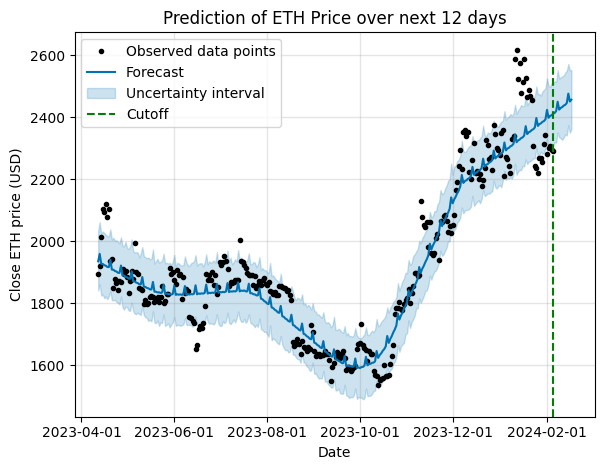

In [30]:
fig, ax = plt.subplots()
fig1 = m.plot(prediction, ax, include_legend=True)
plt.title(f"Prediction of ETH Price over next {days_for_forecast} days")
ax.set_xlabel("Date")
plt.axvline(x = data.iloc[-1].ds, color = 'g',linestyle='--', label = 'Cutoff')
#plt.vlines([1,2,3], 0, 1, label='test')
plt.legend()
plt.tight_layout()
ax.set_xticks(ax.get_xticks()[::2])
ax.set_ylabel(f"Close {token} price (USD)")

# #figure1 = m.plot(forecast)
# fig2 = m.plot_components(prediction)

In [31]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
307,2024-02-13,2403.423421,2345.303800,2544.973477,2399.478549,2407.880556,37.238580,37.238580,37.238580,41.957453,41.957453,41.957453,-4.718873,-4.718873,-4.718873,0.0,0.0,0.0,2440.662001
308,2024-02-14,2407.179688,2341.623836,2550.485166,2402.130203,2412.839550,39.257461,39.257461,39.257461,41.957453,41.957453,41.957453,-2.699992,-2.699992,-2.699992,0.0,0.0,0.0,2446.437149
309,2024-02-15,2410.935954,2374.623585,2572.542871,2404.533039,2418.227267,65.971465,65.971465,65.971465,41.957453,41.957453,41.957453,24.014012,24.014012,24.014012,0.0,0.0,0.0,2476.907420
310,2024-02-16,2414.692221,2350.519907,2552.302172,2406.834338,2423.394494,36.567305,36.567305,36.567305,41.957453,41.957453,41.957453,-5.390148,-5.390148,-5.390148,0.0,0.0,0.0,2451.259526
311,2024-02-17,2418.448487,2361.513713,2552.942977,2408.826680,2429.113406,38.729888,38.729888,38.729888,41.957453,41.957453,41.957453,-3.227566,-3.227566,-3.227566,0.0,0.0,0.0,2457.178375


In [39]:
new_rows = prediction[~prediction.ds.isin(data['ds'].unique())]

In [47]:
new_rows.yhat.quantile([0.25, 0.5, 0.75])

0.25    2429.404797
0.50    2439.447877
0.75    2450.775047
Name: yhat, dtype: float64